### 텐서플로우와 mnist데이터터

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist=keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

In [2]:
print('train_images.shape=', train_images.shape)
print("trian_labels.shape=", train_labels.shape)
print('test_images.shape=', test_images.shape)
print('test_labels.shape=', test_labels.shape)

train_images.shape= (60000, 28, 28)
trian_labels.shape= (60000,)
test_images.shape= (10000, 28, 28)
test_labels.shape= (10000,)


In [4]:
num=train_images[0]
for i in range(28):
    for j in range(28):
        print("{:3d}".format(num[i][j]), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [7]:
print('train_labels[0]=', train_labels[0])

train_labels[0]= 5


### mnist 데이터 시각화화

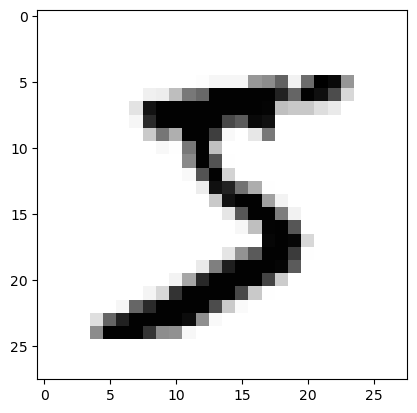

In [10]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap='Greys')

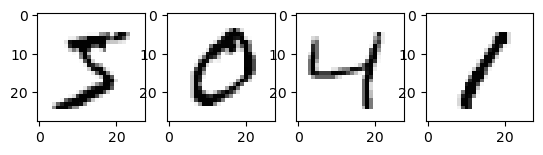

In [12]:
fig=plt.figure()
ax1=fig.add_subplot(1, 4, 1)
ax2=fig.add_subplot(1, 4, 2)
ax3=fig.add_subplot(1, 4, 3)
ax4=fig.add_subplot(1, 4, 4)

ax1.imshow(train_images[0], cmap='Greys')
ax2.imshow(train_images[1], cmap='Greys')
ax3.imshow(train_images[2], cmap='Greys')
ax4.imshow(train_images[3], cmap='Greys')

In [13]:
print('trian_labels[:4]=', train_labels[:4])

trian_labels[:4]= [5 0 4 1]


### 딥러닝을 위한 모델 만들기와 학습단계계

In [14]:
#1. 데이터 전처리
train_images, test_images=train_images/255, test_images/255

In [16]:
# 2. 신경망 모델 만들기
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 60)             │        47,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,710 (186.37 KB)

 Trainable params: 47,710 (186.37 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
#3. 신경망 모델의 활성화함수, 최적화함수, 측정 방법 정의
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
#4. 학습용 데이터로 모델 학습시키기
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8534 - loss: 0.5167
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9546 - loss: 0.1578
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9672 - loss: 0.1134


In [25]:
#5. 모델의 정확도 알아보기
test_loss, test_acc=model.evaluate(test_images, test_labels, verbose=2)
print('\n테스트 정확도: ', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.9676 - loss: 0.1090

테스트 정확도:  0.9675999879837036


### 부드러운 최대값: 소프트맥스 함수

In [27]:
import numpy as np

def softmax(a):
    exp_of_a=np.exp(a)
    sum_exp=np.sum(exp_of_a)
    y=exp_of_a/sum_exp
    return y

a=np.array([0.5, 4.1, 2.5, 5.6, 1.2])
print("신경망의 예측 값:", a)
print("소프트맥스 함수의 출력: ", softmax(a))

신경망의 예측 값: [0.5 4.1 2.5 5.6 1.2]
소프트맥스 함수의 출력:  [0.00473882 0.17343248 0.03501541 0.77727047 0.00954281]


In [29]:
np.set_printoptions(precision=4, suppress=True)
print('소프트맥스 함수의 출력: ', softmax(a))

소프트맥스 함수의 출력:  [0.0047 0.1734 0.035  0.7773 0.0095]


In [30]:
print('소프트맥스 함수의 최대값: ', np.max(softmax(a)).round(4))

소프트맥스 함수의 최대값:  0.7773


In [31]:
print('소프트맥스 함수 출력의 argmax: ', np.argmax(softmax(a)))

소프트맥스 함수 출력의 argmax:  3


In [32]:
a=np.array([0.5, 4.1, 2.5, 5.6, 1.2])*2
print('신경망의 예측값: ', a)
print('소프트맥스 함수의 출력: ', softmax(a))
print('소프트맥스 함수의 최댓값: ', np.max(softmax(a)))

신경망의 예측값:  [ 1.   8.2  5.  11.2  2.4]
소프트맥스 함수의 출력:  [0.     0.0473 0.0019 0.9506 0.0001]
소프트맥스 함수의 최댓값:  0.9505663642857384


### 원 핫 인코딩과 범주형 데이터의 평균 제곱 오차

In [33]:
import numpy as np
from keras.utils import to_categorical

data=np.array([0, 1, 2, 3, 4])
print("인코딩할 원본 데이터: ", data)
encoded=to_categorical(data)
print(encoded)

인코딩할 원본 데이터:  [0 1 2 3 4]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [34]:
color_data=['red', 'green', 'blue']
#리스트 축약 코드를 사용하여 딕셔너리 자료형으로 만들자
color_dic={v:k for v, k in enumerate(color_data)}
print(color_dic)

{0: 'red', 1: 'green', 2: 'blue'}


In [35]:
data=np.array(list(color_dic.keys()))
print('인코딩할 원본 데이터: ', data)

encoded=to_categorical(data)
print("원-핫 인코딩된 데이터: ")
print(encoded)

인코딩할 원본 데이터:  [0 1 2]
원-핫 인코딩된 데이터: 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [36]:
target=np.array([0, 0, 0, 1, 0])
y_hat=np.array([0.005, 0.173, 0.035, 0.777, 0.01])

def mse(y, t):
    return ((y-t)**2).mean()

print('y_hat와 target의 오차: ', mse(y_hat, target))

y_hat와 target의 오차:  0.016201599999999997


In [37]:
other_y_hat=np.array([0.1, 0.3, 0.5, 0.02, 0.08])

print('other_y_hat과 target의 오차: ', mse(other_y_hat, target))

other_y_hat과 target의 오차:  0.26336


### 원-핫 인코딩 데이터의 오차를 구하는 교차 엔트로피 오차차

In [41]:
def cee(y, t):
    delta=1e-7
    return -np.sum(t*np.log(y+delta))

t=np.array([0, 0, 1])
y_hat=np.array([0.4, 0.05, 0.55])
y_hat2=np.array([0.9, 0.09, 0.01])

print('y_hat과의 cee: {: .2f}'.format(cee(y_hat, t)))
print('y_hat2와의 cee: {: .2f}'.format(cee(y_hat2, t)))

y_hat과의 cee:  0.60
y_hat2와의 cee:  4.61
